In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cdtx_train = pd.read_csv('/home/bill/moneylaundring/contest/processed_dataset/cdtx_train.csv')
dp_train = pd.read_csv('/home/bill/moneylaundring/contest/processed_dataset/dp_train.csv')
remit_train = pd.read_csv('/home/bill/moneylaundring/contest/processed_dataset/remit_train.csv')

In [5]:
cdtx_X = cdtx_train.iloc[:,1:-1].values
cdtx_y = cdtx_train.iloc[:,-1].values
cdtx_idx = cdtx_train[['alert_key']]

In [6]:
cdtx_idx

,alert_key
0,316973
1,345532
2,325899
3,344036
4,344036
...,...
48102,351269
48103,351269
48104,351654
48105,351904


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test , train_indices, test_indices= train_test_split(cdtx_X, cdtx_y, cdtx_idx, test_size = 0.1, random_state=0)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [9]:
cdtx_ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'),[0,1,3,4,5,8]),('standardscaler',StandardScaler(),[2,6,7])], remainder='passthrough')
X_train = cdtx_ct.fit_transform(X_train)
X_test = cdtx_ct.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# classifier = RandomForestClassifier(n_estimators=100, criterion='log_loss', random_state=0)
# classifier.fit(X_train, y_train.values.ravel())
regressor = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
regressor.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
y_pred = regressor.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4763    0]
 [   6   42]]


In [13]:
print('Test set Accuracy: {:.2f} %'.format(accuracy_score(y_test, y_pred)*100))

Test set Accuracy: 99.88 %


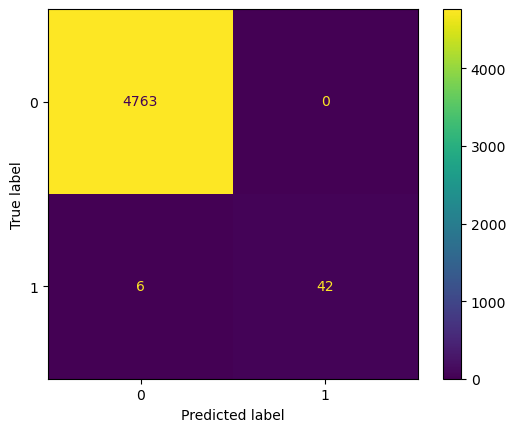

In [14]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()